In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def dynasty(t,y,R,E,B=0.17,D=0.42,G=0.09,H=0.1,Q=0.4):
    return np.array([
        y[0]*(1-y[0]-y[1]/(B+y[0])-H*y[2]),
        Q*y[1]*(E*y[0]/(B+y[0])-1-y[2]/(D+y[1])),
        R*(y[0]*y[1]/(B+y[0])-G*y[2])
    ])
def jacobian(t,y,R,E,B=0.17,D=0.42,G=0.09,H=0.1,Q=0.4):
    deny0 = 1/(B+y[0]);
    deny1 = 1/(D+y[1]);
    deny0square = deny0**2;
    deny1square = deny1**2;
    return np.array([
        [1-2*y[0]-B*y[1]*deny0square-H*y[2], -y[0]*deny0, -H*y[0]],
        [Q*E*B*y[1]*deny0square, Q*E*y[0]*deny0-Q*D*y[2]*deny1square-Q, -Q*y[1]*deny1],
        [R*B*y[1]*deny0square, R*y[0]*deny0, -R*G]
    ])
def y0min(t,y,B=0.17,H=0.1):
    return y[0]*(1-y[0]-y[1]/(B+y[0])-H*y[2])
y0min.direction = 1

In [7]:
reltol = 1e-10
abstol = 1e-6 + np.zeros(3)
tend = 20000.
R = 0.1
E = 1.5
y0 = np.array([0.8,0.1,0.1])
sol = solve_ivp(lambda t,y: dynasty(t,y,R,E),
                [0,tend], y0, method='BDF',
                jac=lambda t,y: jacobian(t,y,R,E),
                events=y0min,
                rtol=reltol, atol=abstol)
t = sol['t']
y = sol['y']

In [9]:
sol['y'][:,-1]

array([0.97691713, 0.01269461, 0.12014408])

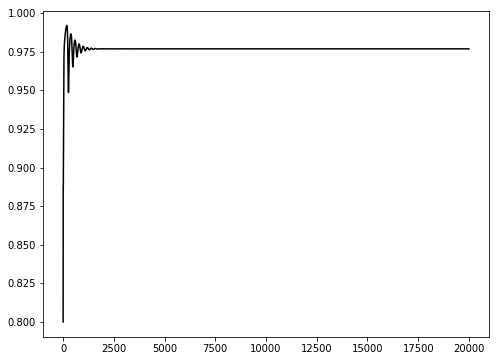

In [8]:
plt.figure(figsize=(8,6))
plt.plot(t,y[0],'k')
#for ev in sol['t_events'][0]:
#    plt.plot([ev,ev],[0,1],'r--')
#plt.axis([375,400,0,0.1])
plt.show()

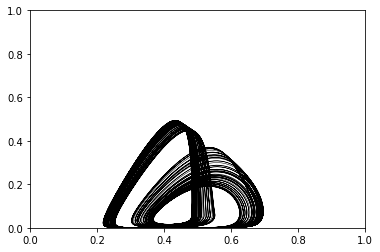

In [66]:
idx = t>3000
plt.plot(y[2][idx],y[1][idx],'k',lw=0.5)
plt.axis([0,1,0,1])
plt.show()